In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

(150, 4)


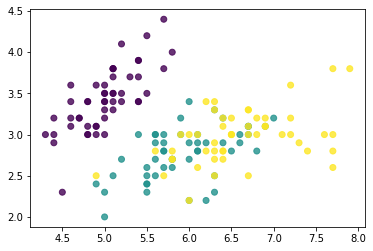

In [3]:
iris =load_iris()
x =iris.data
y = iris.target
print(x.shape)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print('Train set : ', x_train.shape)
print('Test set : ', x_test.shape)

Train set :  (120, 4)
Test set :  (30, 4)


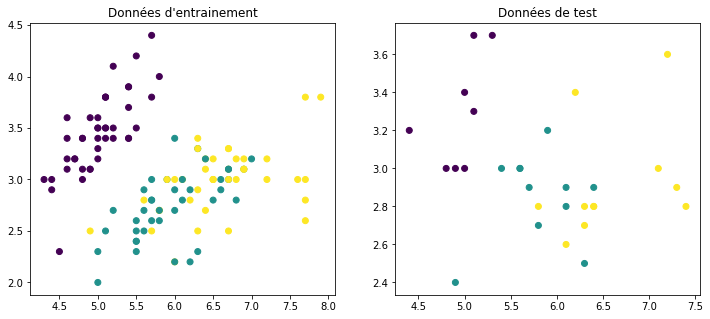

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.title('Données d\'entrainement')
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.title('Données de test')
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
model.fit(x_train, y_train)
print('Score de précision du train set', model.score(x_train, y_train))
print('Score de précision du test set',model.score(x_test, y_test))

Score de précision du train set 1.0
Score de précision du test set 0.9


In [10]:
predictions = model.predict(x_test)

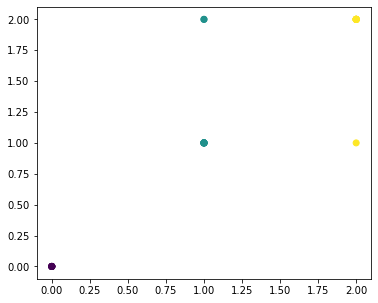

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,predictions, c=y_test)
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [14]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

In [15]:
from sklearn.model_selection import validation_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


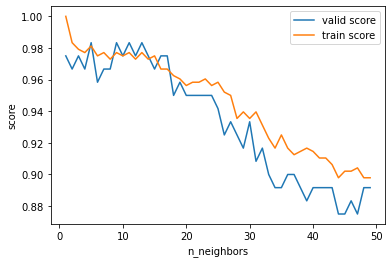

In [16]:
k = np.arange(1,50)
train_score, val_score = validation_curve(KNeighborsClassifier(), x_train, 
                                          y_train, 'n_neighbors', k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='valid score')
plt.plot(k, train_score.mean(axis=1), label='train score')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_neighbors' : np.arange(1,25),
             'metric' : ['euclidiean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclidiean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable functio

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclidiean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable functio

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidiean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [24]:
grid.best_score_

0.975

In [25]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [26]:
p_model=grid.best_estimator_
p_model.score(x_test, y_test)

0.8666666666666667

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, p_model.predict(x_test))

array([[8, 0, 0],
       [0, 9, 2],
       [0, 2, 9]], dtype=int64)